## class MDP

Specifies : 

$$
(S,A,\mathbf{P},r,\nu,\gamma)
$$

where :
| Term                          | Notation                                         | Notes                                   |
|:----------------------------- |:------------------------------------------------ |:--------------------------------------- |
| Finite state space            | $S$                                              | $\lvert S \lvert=n$                     |
| Finite action space           | $A$                                              | $\lvert A \lvert = m$                   |
| Markovian transition law      | $\mathbf{P} : S \times A \rightarrow \Delta_S$ | maps onto the state probability simplex |
| Initial state distribution    | $\nu \in \Delta_S$                               |                                         |
| Reward vector                 | $r \in \mathbb{R}^{n \times m}$                  |                                         |
| Discount Factor               | $\gamma \in (0,1)$                               |                                         |

(see implementation in the env.mdp file)
		

## class Gridworld 
- should take as input world size
- should provide a plot function
- be seedable
- have a step(a) method that returns an observation ???
- provide the vector-form variables used in analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from env.gridworld import Gridworld
from algs.dynprog import ValueIterator, PolicyIterator

## Instanciating the environment

In [2]:
MDP = Gridworld(
    grid_width  = 5, 
    grid_height = 5, 
    noise       = 0.2, 
    gamma       = 0.8, 
    goals       = [((2,3),2.0) ]
)

#### Plotting the markov transition probability function for a bunch of situations

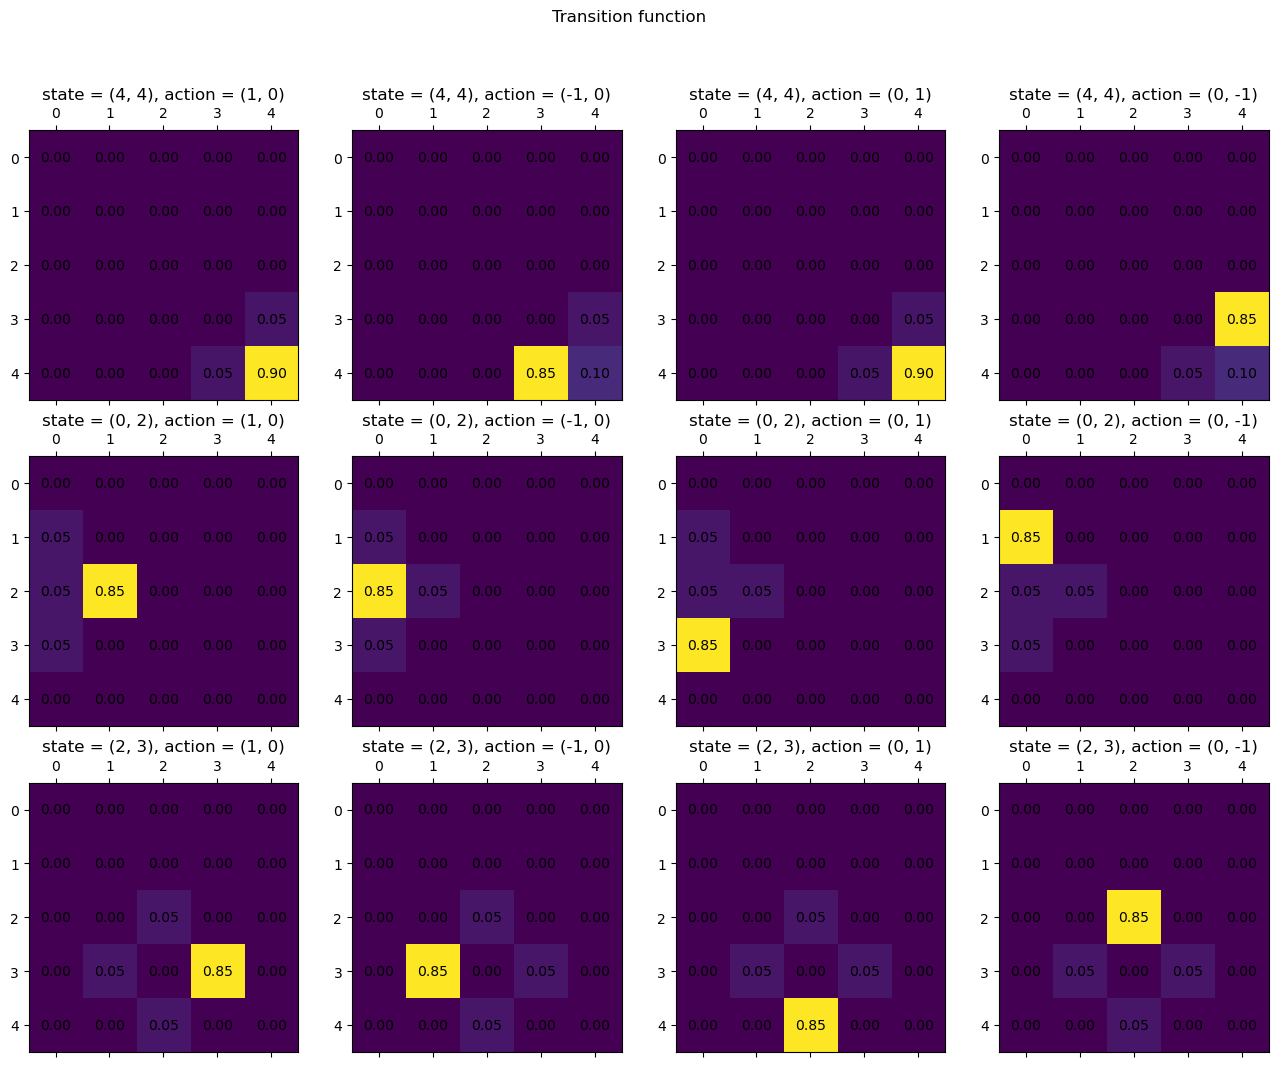

In [3]:
points = [(4,4),(0,2),(2,3)]
size = 4.
point = (2,2)
action = 3

fig, axs = plt.subplots(3,4,figsize=(4*size,3*size))
for p_id, point in enumerate(points):
    for action in range(4):
        gridprob = MDP.states2grid(MDP.next_state_distribution(MDP.point2state(point),action))
        ax = axs[p_id,action]
        ax.matshow(gridprob)
        ax.set_title(f'state = {point}, action = {MDP.actions[action]}')
        for (i, j), z in np.ndenumerate(gridprob):
            ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
fig.suptitle('Transition function')
plt.show()

#### Plotting the reward function for a bunch of situations

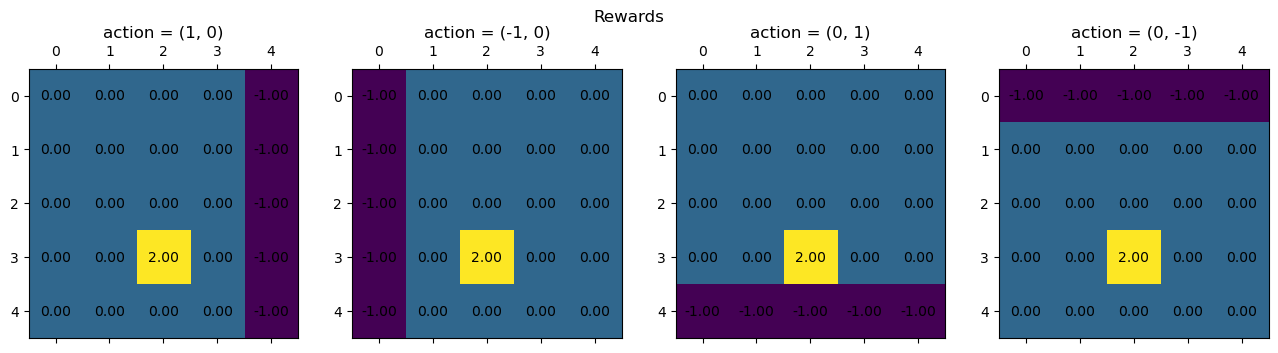

In [4]:
size = 4.
point = (2,2)
action = 3

fig, axs = plt.subplots(1,4,figsize=(4*size,1*size))

for action in range(4):
    gridreward = MDP.states2grid(MDP.R[:,action])
    ax = axs[action]
    ax.matshow(gridreward)
    ax.set_title(f'action = {MDP.actions[action]}')
    for (i, j), z in np.ndenumerate(gridreward):
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
fig.suptitle('Rewards')
plt.show()

## Dynamic Progamming methods 

#### Value Iteration

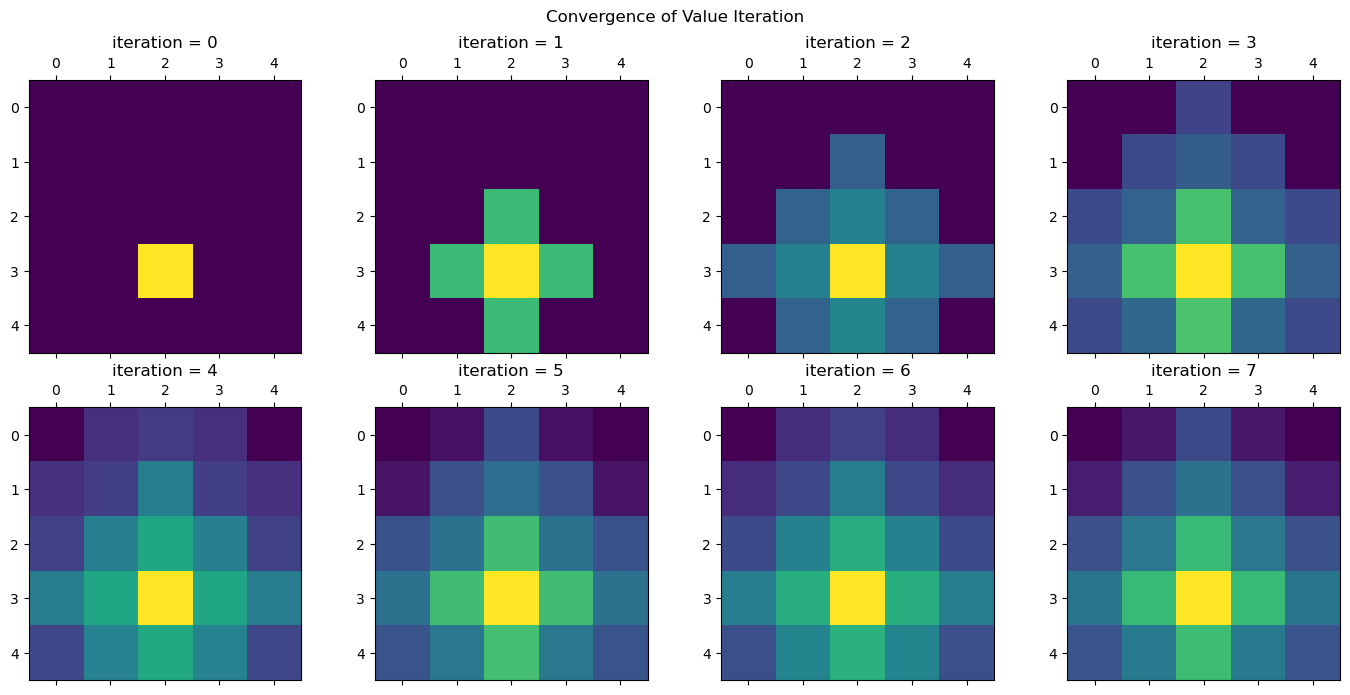

In [5]:
VI = ValueIterator(MDP)
valgrids = []
for i in range(8):
    VI.solve(1)
    valgrids += [MDP.states2grid(VI.V_t)]

sz = 7
fig, ax = plt.subplots(2,4,figsize=(2*sz,sz))
for i in range(8):
    ax[i//4,i%4].matshow(valgrids[i])
    ax[i//4,i%4].set_title(f'iteration = {i}')
fig.suptitle('Convergence of Value Iteration')
fig.tight_layout()
plt.show()

##### Recovering the policy from VI

' Axes are inverted compared to the cmap plots above \n    but this is correct (see the color of the arrows which represents value) '

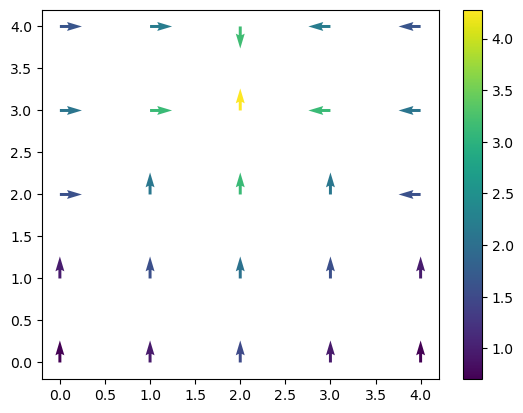

In [6]:
pi = VI.recover_policy()
X = [MDP.state2point(p)[0] for p,_ in enumerate(pi)]
Y = [MDP.state2point(p)[1] for p,_ in enumerate(pi)]
U = [MDP.actions[a][0] for _,a in enumerate(pi)]
V = [MDP.actions[a][1] for _,a in enumerate(pi)]
plt.quiver(X,Y,U,V,VI.V_t)
plt.colorbar()
""" Axes are inverted compared to the cmap plots above 
    but this is correct (see the color of the arrows which represents value) """

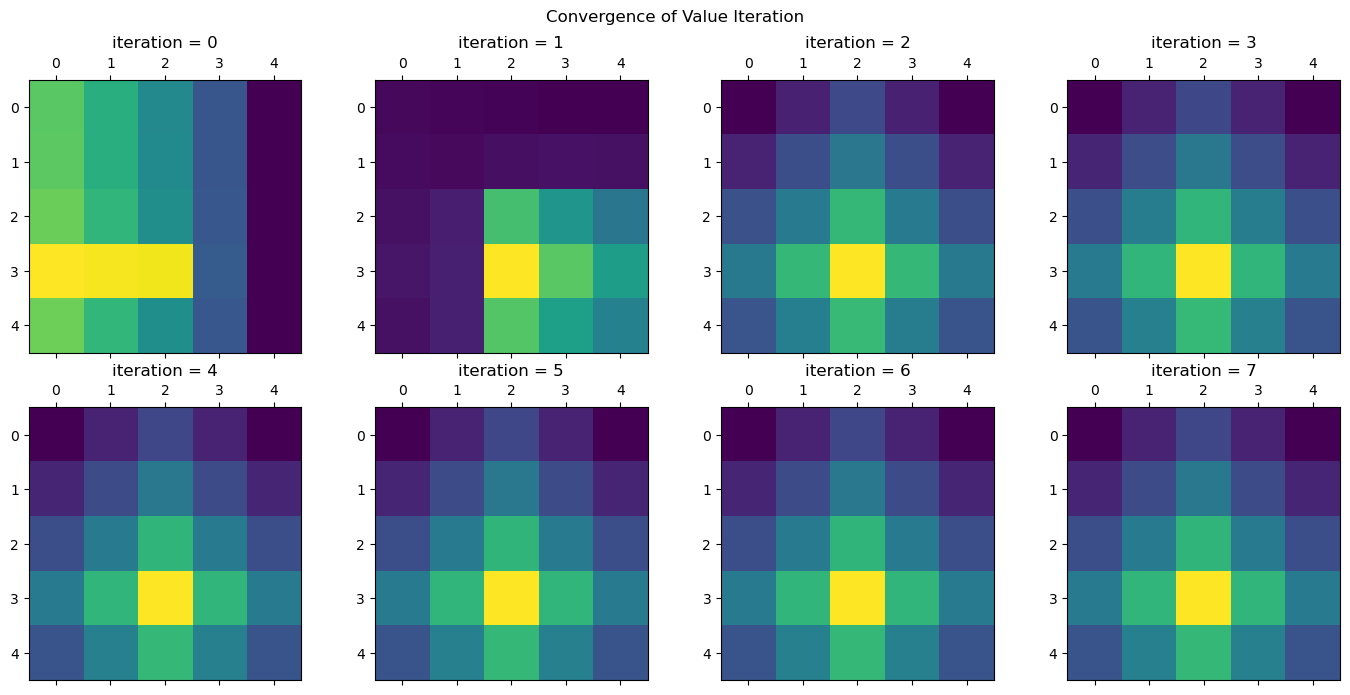

In [8]:
PI = PolicyIterator(MDP)
valgrids = []
for i in range(8):
    PI.solve(1,10)
    valgrids += [MDP.states2grid(PI.V_t)]

sz = 7
fig, ax = plt.subplots(2,4,figsize=(2*sz,sz))
for i in range(8):
    ax[i//4,i%4].matshow(valgrids[i])
    ax[i//4,i%4].set_title(f'iteration = {i}')
fig.suptitle('Convergence of Value Iteration')
fig.tight_layout()
plt.show()

' Axes are inverted compared to the cmap plots above \n    but this is correct (see the color of the arrows which represents value) '

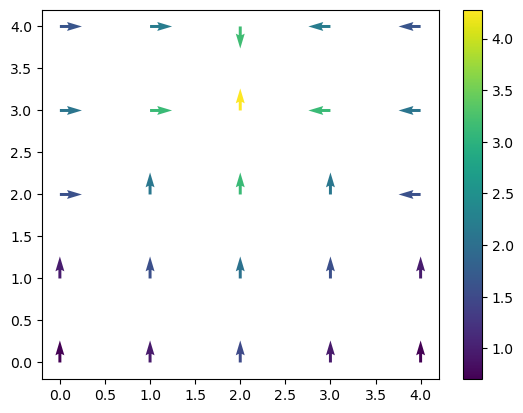

In [9]:
pi = PI.pi_t
X = [MDP.state2point(p)[0] for p,_ in enumerate(pi)]
Y = [MDP.state2point(p)[1] for p,_ in enumerate(pi)]
U = [MDP.actions[a][0] for _,a in enumerate(pi)]
V = [MDP.actions[a][1] for _,a in enumerate(pi)]
plt.quiver(X,Y,U,V,VI.V_t)
plt.colorbar()
""" Axes are inverted compared to the cmap plots above 
    but this is correct (see the color of the arrows which represents value) """